(RM01)=
# RM01

Consider the following constrained optimization problem:

$$
\begin{array}{llll}
\textrm{minimize}   & f(x_1, x_2)     &= ( x_1 - 3 )^2 + ( x_2 - 2 )^2 & \\
\textrm{subject to} & g_{1}(x_1, x_2) &= {x_1}^2 + {x_2}^2 - 5 &\leq 0, \\
                    & g_{2}(x_1, x_2) &= {x_1} +  2{x_2} - 4   &\leq 0, \\
                    & g_{3}(x_1, x_2) &= -{x_1} &\leq 0, \\
                    & g_{4}(x_1, x_2) &= -{x_2} &\leq 0, \\
\end{array}
$$

with

$$
\nabla     f(x_1, x_2) = \begin{pmatrix} 2(x_1 - 3) \\ 2(x_2 - 2) \end{pmatrix}, \quad
\nabla g_{1}(x_1, x_2) = \begin{pmatrix} 2 x_1 \\ 2 x_2 \end{pmatrix}, \quad
\nabla g_{2}(x_1, x_2) = \begin{pmatrix} 1 \\ 2 \end{pmatrix}.
$$

The optimal point is
$\begin{pmatrix} {x_1}^{*} \\ {x_2}^{*} \end{pmatrix} = \begin{pmatrix} 2 \\ 1 \end{pmatrix}$
with $f({x_1}^{*}, {x_2}^{*}) = 2$ and
$\nabla f({x_1}^{*}, {x_2}^{*}) = \begin{pmatrix} -2 \\ -2 \end{pmatrix}$.

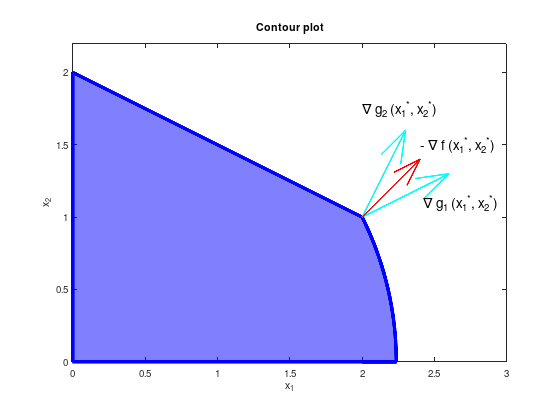

In [30]:
% Optimal point.
px = 2;
py = 1;

g1 = @(x) real (sqrt (5 - x.^2));
g2 = @(x) -(x - 4) ./ 2;

% Visualize constrained set of feasible solutions (blue).
x = linspace (2, sqrt(5), 100);
area ([0 2 x], [g2(0) g2(2) g1(x)], ...
  'FaceColor', 'blue', ...
  'FaceAlpha', 0.5, ...
  'LineWidth', 4, ...
  'EdgeColor', 'blue');

% Visualize scaled gradients of objective function (red arrow)
% and constraint functions (cyan arrows).
hold on;
quiver (px, py, 0.15 * 4, 0.15 * 2, 'LineWidth', 2, 'c');
quiver (px, py, 0.3  * 1, 0.3  * 2, 'LineWidth', 2, 'c');
quiver (px, py, 0.2  * 2, 0.2  * 2, 'LineWidth', 2, 'r');
text (2.40, 1.50, '- \nabla f ({x_1}^{*}, {x_2}^{*})', 'FontSize', 14);
text (2.00, 1.75, '\nabla g_2 ({x_1}^{*}, {x_2}^{*})', 'FontSize', 14);
text (2.42, 1.10, '\nabla g_1 ({x_1}^{*}, {x_2}^{*})', 'FontSize', 14);
axis equal;
xlim ([0 3.0]);
ylim ([0 2.2]);
xlabel ('x_1');
ylabel ('x_2');
title ('Contour plot');

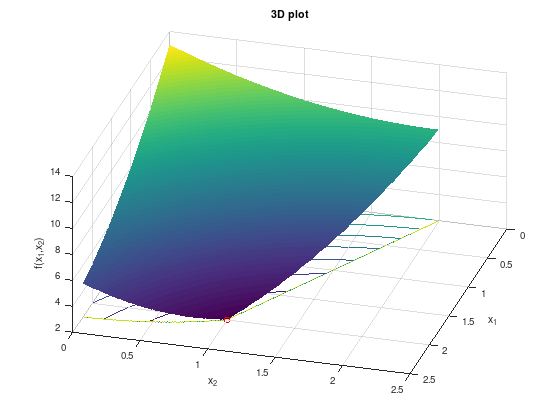

In [35]:
% Optimal point.
px = 2;
py = 1;
pz = 2;

[X1, X2] = meshgrid (linspace (0, 2.5, 500));
FX = (X1 - 3).^2 + (X2 - 2).^2;

% Remove infeasible points.
FX((X1.^2 + X2.^2) > 5) = inf;
FX(X1 + 2*X2 > 4) = inf;
surfc (X1, X2, FX);
shading flat;
hold on;
plot3 (px, py, pz, 'ro');
xlabel ('x_1');
ylabel ('x_2');
zlabel ('f(x_1,x_2)');
title ('3D plot');
view (106, 44);

At the optimal point only the constraints $g_{1}$ and $g_{2}$ are active,
thus ${\lambda_3}^{*} = {\lambda_4}^{*} = 0$.

According to KKT,
there exist unique ${\lambda_1}^{*} \geq 0$, ${\lambda_2}^{*} \geq 0$ with

$$
\begin{pmatrix} -2 \\ -2 \end{pmatrix}
+ {\lambda_1}^{*} \begin{pmatrix} 4 \\ 2 \end{pmatrix}
+ {\lambda_2}^{*} \begin{pmatrix} 1 \\ 2 \end{pmatrix} = 0
$$

thus ${\lambda_1}^{*} = \frac{1}{3}$
and ${\lambda_2}^{*} = \frac{2}{3}$.

## Numerical experiment (only Matlab)

In [ ]:
function RM01()
  % Nonlinear objective function.
  fun = @(x) (x(1) - 3).^2 + (x(2) - 2).^2;

  % Starting point.
  x0 = [2, 1];

  % Linear inequality constraints A * x <= b.
  A = [1 2];  % g_2
  b = [4];

  % Linear equality constraints Aeq * x = beq.
  Aeq = [];
  beq = [];

  % Bounds lb <= x <= ub
  lb = [0, 0];      % g_3 and g_4
  ub = [];

  % Call solver.
  [x,fval,exitflag,output,lambda,grad,hessian] = fmincon (fun,x0,A,b,Aeq,beq,lb,ub,@nonlcon);
  
  % Display interesting details.
  
  exitflag  % == 1 success
  x         % optimal solution
  fval      % function value at optimal solution
  grad      % gradient of fun at optimal solution
  hessian   % Hessian matrix of fun at optimal solution
  lambda    % Lagrange parameter
  lambda.lower       % lambda_3 and lambda_4
  lambda.ineqlin     % lambda_2
  lambda.ineqnonlin  % lambda_1
end

% Nonlinear constraint function for g_1.
function [c,ceq] = nonlcon(x)
  c = x(1).^2 + x(2).^2 - 5;
  ceq = 0;
end
